In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
phil = pd.read_csv('PhilData/archive.csv')
phil = phil[phil['Year'] != '1901-2000']
phil['Year'] = phil['Year'].astype(int)

In [3]:
phil[phil['Year'] == 1942]

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
56,1942,Partial Shadow,30.74,20.1,29.7,23.2,41.31,35.7,44.1,37.8


In [4]:
phil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         131 non-null    int32  
 1   Punxsutawney Phil                            131 non-null    object 
 2   February Average Temperature                 122 non-null    float64
 3   February Average Temperature (Northeast)     122 non-null    float64
 4   February Average Temperature (Midwest)       122 non-null    float64
 5   February Average Temperature (Pennsylvania)  122 non-null    float64
 6   March Average Temperature                    122 non-null    float64
 7   March Average Temperature (Northeast)        122 non-null    float64
 8   March Average Temperature (Midwest)          122 non-null    float64
 9   March Average Temperature (Pennsylvania)     122 non-null    float64
dtypes:

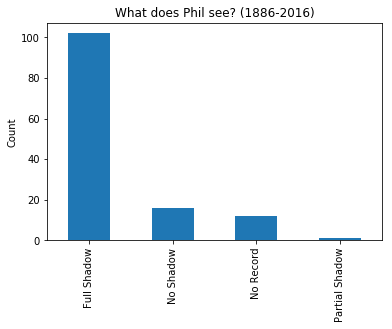

In [5]:
# Full shadow: Next 6 weeks colder than usual (extended Winter)
# No shadow: Warmer weather and earlier Spring
# Partial shadow: 
phil['Punxsutawney Phil'].value_counts().plot(kind='bar')
plt.title('What does Phil see? (1886-2016)')
plt.ylabel('Count');

In [6]:
phil['Punxsutawney Phil'].value_counts()

Full Shadow       102
No Shadow          16
No Record          12
Partial Shadow      1
Name: Punxsutawney Phil, dtype: int64

In [7]:
february = phil['February Average Temperature']
february = february[~pd.isnull(february)]
february.values

array([26.6 , 35.04, 33.39, 35.37, 25.5 , 30.76, 29.86, 31.46, 28.42,
       31.59, 26.94, 33.69, 35.46, 33.01, 35.02, 29.3 , 33.66, 31.08,
       29.5 , 29.52, 35.94, 33.03, 30.09, 33.82, 32.25, 33.69, 36.9 ,
       31.95, 29.57, 35.19, 38.3 , 37.67, 37.9 , 34.34, 26.92, 40.1 ,
       37.94, 36.7 , 29.59, 34.32, 36.01, 25.23, 31.73, 36.  , 29.98,
       33.85, 33.53, 30.74, 36.28, 34.5 , 35.28, 34.88, 31.41, 31.62,
       31.91, 35.55, 34.54, 35.46, 35.87, 41.41, 31.05, 32.27, 38.07,
       31.98, 32.49, 30.52, 37.42, 34.92, 34.12, 31.77, 32.52, 31.24,
       32.88, 32.92, 32.81, 35.35, 33.48, 33.55, 33.58, 34.74, 32.76,
       39.56, 36.03, 27.99, 28.13, 32.85, 36.59, 32.59, 36.86, 37.38,
       30.87, 35.85, 37.38, 33.69, 29.17, 36.7 , 39.81, 39.7 , 31.14,
       31.87, 37.36, 35.69, 36.05, 38.71, 39.49, 39.78, 33.98, 36.39,
       32.79, 33.57, 37.94, 34.83, 32.41, 34.7 , 36.77, 31.8 , 33.04,
       37.51, 34.77, 32.13, 32.99, 39.47])

In [8]:
march = phil['March Average Temperature']
march = march[~pd.isnull(march)]
march.values

array([39.97, 38.03, 38.79, 41.05, 37.63, 41.27, 40.71, 41.58, 42.21,
       41.76, 45.12, 36.1 , 45.7 , 43.92, 40.35, 49.44, 44.02, 35.76,
       38.71, 40.75, 36.95, 42.15, 38.35, 45.75, 40.89, 40.28, 46.63,
       40.42, 38.3 , 37.18, 44.24, 39.65, 42.26, 43.12, 43.56, 40.41,
       39.42, 37.36, 41.83, 42.78, 43.61, 43.43, 38.84, 45.01, 42.51,
       41.52, 39.2 , 41.31, 38.5 , 38.5 , 45.54, 46.78, 38.75, 38.71,
       40.77, 38.84, 38.55, 37.69, 43.75, 39.25, 40.06, 40.75, 41.27,
       37.67, 41.45, 35.91, 43.47, 37.9 , 43.72, 38.82, 35.44, 43.  ,
       43.63, 43.56, 36.03, 38.5 , 39.65, 44.04, 44.29, 44.38, 38.7 ,
       42.31, 43.18, 41.31, 42.06, 39.36, 42.85, 42.03, 42.4 , 40.08,
       43.48, 46.18, 42.57, 42.4 , 42.67, 44.74, 43.32, 44.71, 41.79,
       44.51, 43.34, 39.02, 44.67, 41.34, 42.8 , 46.04, 41.49, 39.54,
       43.3 , 47.41, 42.31, 42.62, 47.66, 41.86, 42.87, 43.57, 43.07,
       50.41, 40.91, 40.51, 45.39, 47.5 ])

In [9]:
phil_nonnull = phil.dropna(how='any').copy()
phil_nonnull = phil_nonnull[phil_nonnull['Punxsutawney Phil'] != 'No Record']
phil_nonnull

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
12,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
14,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
15,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
17,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
18,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0
...,...,...,...,...,...,...,...,...,...,...
126,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6


### February Temperature Analysis

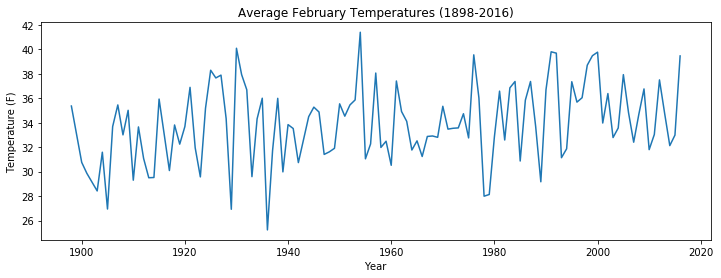

In [10]:
phil_nonnull.plot(x='Year', y='February Average Temperature', kind='line', figsize=(12, 4), legend=None)
plt.title('Average February Temperatures (1898-2016)')
plt.ylabel('Temperature (F)');

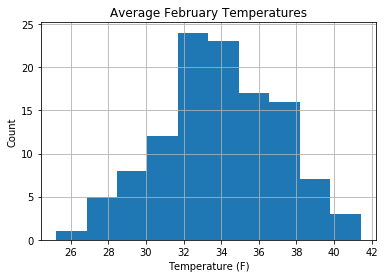

In [11]:
phil_nonnull['February Average Temperature'].hist()
plt.title('Average February Temperatures')
plt.xlabel('Temperature (F)')
plt.ylabel('Count');

In [12]:
phil_nonnull['February Average Temperature'].mean()

33.928103448275856

In [13]:
phil_nonnull['February Average Temperature'].median()

33.69

### March Temperature Analysis

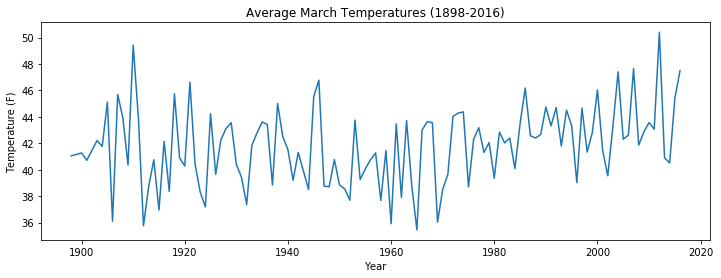

In [14]:
phil_nonnull.plot(x='Year', y='March Average Temperature', kind='line', figsize=(12, 4), legend=None)
plt.title('Average March Temperatures (1898-2016)')
plt.ylabel('Temperature (F)');

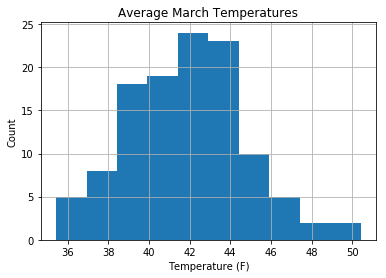

In [15]:
phil_nonnull['March Average Temperature'].hist()
plt.title('Average March Temperatures')
plt.xlabel('Temperature (F)')
plt.ylabel('Count');

In [16]:
phil_nonnull['March Average Temperature'].mean()

41.834310344827585

In [17]:
phil_nonnull['March Average Temperature'].median()

42.045

### Phil's Prediction Analysis

In [18]:
# Mapping predictions. 1 means predicted late Winter, 0 means predicted early Spring
pred_dict = {'Full Shadow': 1, 'Partial Shadow': 1, 'No Shadow': 0}
phil_nonnull['Prediction'] = phil_nonnull['Punxsutawney Phil'].replace(pred_dict)

# Mapping observed truth (based on deviation from average temperature increase from february to march)
temperature_change = phil_nonnull['March Average Temperature'] - phil_nonnull['February Average Temperature']
temperature_dev = temperature_change - temperature_change.mean()
observed = np.sign(temperature_dev).replace({-1.0: 1, 1.0:0})

# Checking Phil's accuracy
np.mean(phil_nonnull['Prediction'] == observed)

0.5

In [19]:
# Checking accuracy of a trivial predictor
# Note, flipping a coin should also just be 50%
trivial = [1] * 116
np.mean(trivial == observed)

0.49137931034482757

In [20]:
# How many extended winters/early springs?
observed.value_counts()

0.0    59
1.0    57
dtype: int64

In [21]:
# Years that should be an early Spring
positive_yr = phil_nonnull['Year'].loc[temperature_dev>0]
#positive_tmp = temperature_dev[temperature_dev>0]
positive_yr

14     1900
15     1901
17     1903
18     1904
19     1905
21     1907
22     1908
24     1910
25     1911
27     1913
28     1914
30     1916
31     1917
32     1918
33     1919
35     1921
36     1922
37     1923
42     1928
43     1929
47     1933
48     1934
50     1936
52     1938
53     1939
56     1942
59     1945
60     1946
63     1949
69     1955
70     1956
73     1959
77     1963
80     1966
81     1967
82     1968
86     1972
87     1973
88     1974
92     1978
93     1979
96     1982
99     1985
100    1986
102    1988
103    1989
104    1990
107    1993
108    1994
111    1997
117    2003
118    2004
121    2007
124    2010
125    2011
126    2012
128    2014
129    2015
130    2016
Name: Year, dtype: int32

In [22]:
# Years that should be an extended winter
negative_yr = phil_nonnull['Year'].loc[temperature_dev<0]
#negative_tmp = temperature_dev[temperature_dev<0]
negative_yr

12     1898
20     1906
23     1909
26     1912
29     1915
34     1920
38     1924
39     1925
40     1926
41     1927
44     1930
45     1931
46     1932
49     1935
51     1937
54     1940
55     1941
58     1944
61     1947
62     1948
64     1950
65     1951
66     1952
67     1953
68     1954
71     1957
72     1958
74     1960
75     1961
76     1962
78     1964
79     1965
83     1969
84     1970
85     1971
89     1975
90     1976
91     1977
94     1980
95     1981
97     1983
98     1984
101    1987
105    1991
106    1992
109    1995
110    1996
112    1998
113    1999
114    2000
115    2001
116    2002
119    2005
120    2006
122    2008
123    2009
127    2013
Name: Year, dtype: int32